In [1]:
%pip install --upgrade DBcm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\fondo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import DBcm

In [3]:
print(dir(DBcm))

['ConnectionError', 'CredentialsError', 'SQLError', 'UseDatabase', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'mysql', 'sqlite3']


In [4]:
creds = {
    "host": "localhost",
    "database": "BlackjackDB",
    "user": "jack",
    "password": "jackpasswd",
}

In [5]:
creds

{'host': 'localhost',
 'database': 'BlackjackDB',
 'user': 'jack',
 'password': 'jackpasswd'}

In [6]:
with open("players.sql") as f:    # file context manager: "f" is a file alias.
    data = f.readlines()
# the file is automatically closed.

In [7]:
data

['insert into players (realname, gamertag, email) values ("Josh", "JDawg", "c00270917@setu.ie");\n',
 'insert into players (realname, gamertag, email) values ("Shane", "idk", "c00270031@setu.ie");\n',
 'insert into players (realname, gamertag, email) values ("Alwyn", "alwyn", "c00271145@setu.ie");\n',
 'insert into players (realname, gamertag, email) values ("Darragh", "FrogGranna", "c00271651@setu.ie");\n',
 'insert into players (realname, gamertag, email) values ("Pavol", "PDawg", "c00272003@setu.ie");\n',
 'insert into players (realname, gamertag, email) values ("Daniel", "frodo", "c00272187@setu.ie");\n',
 'insert into players (realname, gamertag, email) values ("Richie", "The Legend 27", "c00272345@setu.ie");\n',
 'insert into players (realname, gamertag, email) values ("Conor", "xxx_CDawg_xxx", "c00272506@setu.ie");\n',
 'insert into players (realname, gamertag, email) values ("Jack", "Xx_TTV_MadJack69_xX", "c00273123@setu.ie");\n',
 'insert into players (realname, gamertag, emai

In [8]:
with DBcm.UseDatabase(creds) as db:    # database context manager: "db" is a database connection.
    SQL = "select * from games"
    db.execute(SQL)  # sends the SQL command to the server to run.
    results = db.fetchall()  # gets any results from the server.
# automatically closed the database connection.

In [9]:
results

[]

In [10]:
with DBcm.UseDatabase(creds) as db:    
    SQL = "select * from players"
    db.execute(SQL)  
    results = db.fetchall()  
results

[('Josh', 'JDawg', 'c00270917@setu.ie'),
 ('Shane', 'idk', 'c00270031@setu.ie'),
 ('Alwyn', 'alwyn', 'c00271145@setu.ie'),
 ('Darragh', 'FrogGranna', 'c00271651@setu.ie'),
 ('Pavol', 'PDawg', 'c00272003@setu.ie'),
 ('Daniel', 'frodo', 'c00272187@setu.ie'),
 ('Richie', 'The Legend 27', 'c00272345@setu.ie'),
 ('Conor', 'xxx_CDawg_xxx', 'c00272506@setu.ie'),
 ('Jack', 'Xx_TTV_MadJack69_xX', 'c00273123@setu.ie'),
 ('Ruslan', 'Ruark', 'c00273521@setu.ie'),
 ('Killian', 'kio', 'c00275417@setu.ie'),
 ('Adrian', 'Mia', 'c0027xxxxx@setu.ie')]

In [11]:
with DBcm.UseDatabase(creds) as db:    
    SQL = "describe players"
    db.execute(SQL)  
    results = db.fetchall()  
results

[('realname', 'varchar(32)', 'NO', '', None, ''),
 ('gamertag', 'varchar(32)', 'YES', '', None, ''),
 ('email', 'varchar(64)', 'NO', '', None, '')]

In [12]:
type(results)

list

In [13]:
type(results[0])

tuple

In [14]:
results[0][0]

'realname'

In [15]:
with DBcm.UseDatabase(creds) as db:    
    SQL = """
        select count(*) from games 
        where gamertag = "Xx_TTV_MadJack69_xX" and outcome = "Win"
    """
    db.execute(SQL)  
    results = db.fetchall()  
results

[(0,)]

In [16]:
with DBcm.UseDatabase(creds) as db:    
    SQL = """
        select count(*) from games 
        where gamertag = "Xx_TTV_MadJack69_xX" and outcome = "Win"
    """
    db.execute(SQL)  
    results = db.fetchone()  
results

(0,)

In [17]:
results[0]

0

In [18]:
with DBcm.UseDatabase(creds) as db:    
    SQL = """
        select count(*) from games 
        where gamertag = "Xx_TTV_MadJack69_xX" and outcome = "Win"
    """
    db.execute(SQL)  
    results = db.fetchone()  
    wins = results[0]
    SQL = """
        select count(*) from games 
        where gamertag = "Xx_TTV_MadJack69_xX" and outcome = "Loss"
    """
    db.execute(SQL)  
    results = db.fetchone() 
    losses = results[0]

if wins + losses != 0:
    print("Wins:", wins)
    print("Losses:", losses)
    print("Win percentage:", wins / (wins+losses))
else:
    print("Attemptd to preform ZeroDivision")

Attemptd to preform ZeroDivision


In [19]:
import random

In [20]:
SQL = """
    insert into games 
    ( gamertag, outcome, attempts, winstreak )
    values     
    ("Xx_TTV_MadJack69_xX", "Loss", 1, 0)
"""
with DBcm.UseDatabase(creds) as db:
    db.execute(SQL)


SQLError: 1054 (42S22): Unknown column 'winstreak' in 'field list'

In [ ]:
outcome = random.choice(["Win", "Loss"])
outcome

'Loss'

In [ ]:
with DBcm.UseDatabase(creds) as db:
    SQL = """
        select gamertag from players
    """
    db.execute(SQL)
    tags = db.fetchall()

In [ ]:
print(tags)

[('JDawg',), ('idk',), ('alwyn',), ('FrogGranna',), ('PDawg',), ('frodo',), ('The Legend 27',), ('xxx_CDawg_xxx',), ('Xx_TTV_MadJack69_xX',), ('Ruark',), ('kio',), ('Mia',)]


In [ ]:
tags = [ row[0] for row in tags ]
print(tags)

['JDawg', 'idk', 'alwyn', 'FrogGranna', 'PDawg', 'frodo', 'The Legend 27', 'xxx_CDawg_xxx', 'Xx_TTV_MadJack69_xX', 'Ruark', 'kio', 'Mia']


In [ ]:
who = random.choice(tags)
who

'kio'

In [ ]:
def random_gamer():
    with DBcm.UseDatabase(creds) as db:
        SQL = """
            select gamertag from players
        """
        db.execute(SQL)
        tags = db.fetchall()
        tags = [ row[0] for row in tags ]
        who = random.choice(tags)
    return who

In [ ]:
gamer = random_gamer()
outcome = random.choice(["Win", "Loss"])
gamer, outcome

('FrogGranna', 'Loss')

In [ ]:
for _ in range(500):
    SQL = """
        insert into games
        ( gamertag, outcome, attempts, winstreak )
        values     
        (%s, %s, 0, 0)
    """
    gamer = random_gamer()
    outcome = random.choice(["Win", "Loss"])
    with DBcm.UseDatabase(creds) as db:
        db.execute(SQL, (gamer, outcome, ))   # tuple.
        SQL = """select * from games"""
        db.execute(SQL)
        results = db.fetchall()
        ##print(results[-3:])

In [ ]:
len(results)

506

In [ ]:
results[25:50]

[('xxx_CDawg_xxx', 'Win', '0', '0'),
 ('FrogGranna', 'Win', '0', '0'),
 ('alwyn', 'Loss', '0', '0'),
 ('Xx_TTV_MadJack69_xX', 'Win', '0', '0'),
 ('The Legend 27', 'Loss', '0', '0'),
 ('idk', 'Loss', '0', '0'),
 ('PDawg', 'Win', '0', '0'),
 ('alwyn', 'Win', '0', '0'),
 ('The Legend 27', 'Loss', '0', '0'),
 ('PDawg', 'Win', '0', '0'),
 ('idk', 'Win', '0', '0'),
 ('PDawg', 'Win', '0', '0'),
 ('Ruark', 'Loss', '0', '0'),
 ('Ruark', 'Win', '0', '0'),
 ('Ruark', 'Loss', '0', '0'),
 ('xxx_CDawg_xxx', 'Win', '0', '0'),
 ('Ruark', 'Win', '0', '0'),
 ('kio', 'Win', '0', '0'),
 ('The Legend 27', 'Win', '0', '0'),
 ('kio', 'Win', '0', '0'),
 ('frodo', 'Loss', '0', '0'),
 ('idk', 'Loss', '0', '0'),
 ('Xx_TTV_MadJack69_xX', 'Loss', '0', '0'),
 ('frodo', 'Loss', '0', '0'),
 ('JDawg', 'Win', '0', '0')]

In [ ]:
with DBcm.UseDatabase(creds) as db:
    SQL = """select distinct gamertag from games"""
    db.execute(SQL)
    results = db.fetchall()
    print(len(results))

12


In [ ]:
for tag in tags:
    with DBcm.UseDatabase(creds) as db:    
        SQL = """
            select count(*) from games 
            where gamertag = %s and outcome = "Win"
        """
        db.execute(SQL, (tag, ))   # tuple.
        results = db.fetchone()  
        wins = results[0]
        SQL = """
            select count(*) from games 
            where gamertag = %s and outcome = "Loss"
        """
        db.execute(SQL, (tag, ))   # tuple.
        results = db.fetchone() 
        losses = results[0]

    ## print("Wins:", wins)
    ## print("Losses:", losses)
    print(tag, "win percentage:", wins / (wins+losses))
    print("-"*60)

JDawg win percentage: 0.5116279069767442
------------------------------------------------------------
idk win percentage: 0.3333333333333333
------------------------------------------------------------
alwyn win percentage: 0.5
------------------------------------------------------------
FrogGranna win percentage: 0.5106382978723404
------------------------------------------------------------
PDawg win percentage: 0.6363636363636364
------------------------------------------------------------
frodo win percentage: 0.35
------------------------------------------------------------
The Legend 27 win percentage: 0.46153846153846156
------------------------------------------------------------
xxx_CDawg_xxx win percentage: 0.717948717948718
------------------------------------------------------------
Xx_TTV_MadJack69_xX win percentage: 0.48148148148148145
------------------------------------------------------------
Ruark win percentage: 0.525
-------------------------------------------------

In [ ]:
with DBcm.UseDatabase(creds) as db:
    SQL = """select gamertag from games"""
    db.execute(SQL)
    results = db.fetchall()
results[-20:]

[('xxx_CDawg_xxx',),
 ('PDawg',),
 ('Ruark',),
 ('frodo',),
 ('Mia',),
 ('idk',),
 ('JDawg',),
 ('FrogGranna',),
 ('idk',),
 ('idk',),
 ('idk',),
 ('The Legend 27',),
 ('Xx_TTV_MadJack69_xX',),
 ('alwyn',),
 ('The Legend 27',),
 ('frodo',),
 ('The Legend 27',),
 ('The Legend 27',),
 ('FrogGranna',),
 ('The Legend 27',)]

In [ ]:
with DBcm.UseDatabase(creds) as db:
    SQL = """select gamertag from games
             order by gamertag desc"""
    db.execute(SQL)
    results = db.fetchall()
results[-20:]

[('alwyn',),
 ('alwyn',),
 ('alwyn',),
 ('alwyn',),
 ('alwyn',),
 ('alwyn',),
 ('alwyn',),
 ('alwyn',),
 ('alwyn',),
 ('alwyn',),
 ('alwyn',),
 ('alwyn',),
 ('alwyn',),
 ('alwyn',),
 ('alwyn',),
 ('alwyn',),
 ('alwyn',),
 ('alwyn',),
 ('alwyn',),
 ('alwyn',)]

In [ ]:
scores = {}

for tag in tags:
    with DBcm.UseDatabase(creds) as db:    
        SQL = """
            select count(*) from games 
            where gamertag = %s and outcome = "Win"
        """
        db.execute(SQL, (tag, ))   # tuple.
        results = db.fetchone()  
        wins = results[0]
        SQL = """
            select count(*) from games 
            where gamertag = %s and outcome = "Loss"
        """
        db.execute(SQL, (tag, ))   # tuple.
        results = db.fetchone() 
        losses = results[0]

    scores[tag] = int((wins / (wins+losses)) * 100)

In [ ]:
scores

{'JDawg': 51,
 'idk': 33,
 'alwyn': 50,
 'FrogGranna': 51,
 'PDawg': 63,
 'frodo': 35,
 'The Legend 27': 46,
 'xxx_CDawg_xxx': 71,
 'Xx_TTV_MadJack69_xX': 48,
 'Ruark': 52,
 'kio': 53,
 'Mia': 50}

In [ ]:
%pip install --upgrade matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\fondo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


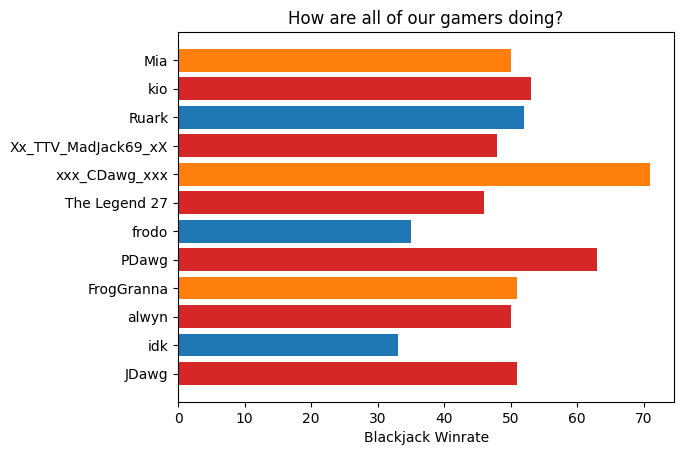

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

y_labels = list(scores.keys())
x_values = list(scores.values())


bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.barh(y_labels, x_values, color=bar_colors)


ax.set_xlabel('Blackjack Winrate')
ax.set_title('How are all of our gamers doing?')

plt.show()

In [ ]:
scores = {}

for tag in tags:
    with DBcm.UseDatabase(creds) as db:    
        SQL = """
            select count(*) from games 
            where gamertag = %s and outcome = "Win"
        """
        db.execute(SQL, (tag, ))   # tuple.
        results = db.fetchone()  
        wins = results[0]
        SQL = """
            select count(*) from games 
            where gamertag = %s and outcome = "Loss"
        """
        db.execute(SQL, (tag, ))   # tuple.
        results = db.fetchone() 
        losses = results[0]

        SQL = """
            select realname from players 
            where gamertag = %s
        """
        db.execute(SQL, (tag, ))   # tuple
        results = db.fetchone() 
        realname = results[0]        

    scores[ f"{tag} ({realname})" ] = int((wins / (wins+losses)) * 100)

In [ ]:
scores

{'JDawg (Josh)': 51,
 'idk (Shane)': 33,
 'alwyn (Alwyn)': 50,
 'FrogGranna (Darragh)': 51,
 'PDawg (Pavol)': 63,
 'frodo (Daniel)': 35,
 'The Legend 27 (Richie)': 46,
 'xxx_CDawg_xxx (Conor)': 71,
 'Xx_TTV_MadJack69_xX (Jack)': 48,
 'Ruark (Ruslan)': 52,
 'kio (Killian)': 53,
 'Mia (Adrian)': 50}

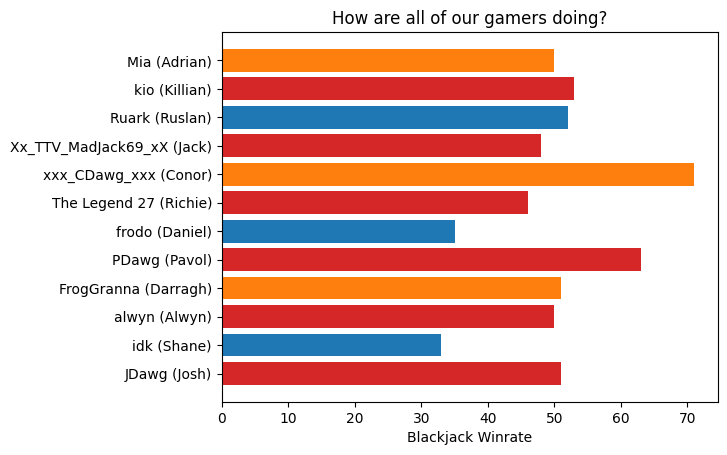

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

y_labels = list(scores.keys())
x_values = list(scores.values())


bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.barh(y_labels, x_values, color=bar_colors)


ax.set_xlabel('Blackjack Winrate')
ax.set_title('How are all of our gamers doing?')

plt.show()

In [ ]:
scores

{'JDawg (Josh)': 51,
 'idk (Shane)': 33,
 'alwyn (Alwyn)': 50,
 'FrogGranna (Darragh)': 51,
 'PDawg (Pavol)': 63,
 'frodo (Daniel)': 35,
 'The Legend 27 (Richie)': 46,
 'xxx_CDawg_xxx (Conor)': 71,
 'Xx_TTV_MadJack69_xX (Jack)': 48,
 'Ruark (Ruslan)': 52,
 'kio (Killian)': 53,
 'Mia (Adrian)': 50}

In [ ]:
for player in sorted(scores, key=scores.get, reverse=True):
    print(player, scores[player])

xxx_CDawg_xxx (Conor) 71
PDawg (Pavol) 63
kio (Killian) 53
Ruark (Ruslan) 52
JDawg (Josh) 51
FrogGranna (Darragh) 51
alwyn (Alwyn) 50
Mia (Adrian) 50
Xx_TTV_MadJack69_xX (Jack) 48
The Legend 27 (Richie) 46
frodo (Daniel) 35
idk (Shane) 33
